<a href="https://colab.research.google.com/github/VardanDavtyan/ML-DL/blob/main/PricePrediction_CareAware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#use t4 gpu for training and predicting data

!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, LabelBinarizer, MinMaxScaler
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, TimeDistributed, LSTM

sns.set(rc = {'figure.figsize': (20, 20)})

In [3]:
data = pd.read_csv('data.csv')
val_data = pd.read_csv('benchmark_data.csv')
data

,Long,Lat,Size,Light,Price_Booking1,Price_Booking2,Price_Booking3,Price_Booking4,Price_Booking5,Price_Booking6,...,Price_Booking511,Price_Booking512,Price_Booking513,Price_Booking514,Price_Booking515,Price_Booking516,Price_Booking517,Price_Booking518,Price_Booking519,Price_Booking520
0,5,-54,medium,0,"(25.82068271676904, 0.7519)","(77.29030734504285, 0.1281)","(26.42977169141242, 0.7555)","(62.99594808649998, 0.2545)","(29.367952575023835, 0.7252)","(12.498892405599015, 0.9243)",...,"(15.452548500178054, 0.8098)","(79.16898963165264, 0.108)","(42.128169836948345, 0.4888)","(90.40108811925055, 0.0577)","(95.08379435621892, 0.0434)","(98.59868991395079, 0.0348)","(66.28525118972154, 0.209)","(10.438122191545451, 0.8847)","(65.58403874417343, 0.219)","(67.03639353949687, 0.207)"
1,15,34,large,1,"(60.5614418412558, 0.0441)","(44.09864114154084, 0.1872)","(12.864575260713796, 0.8316)","(22.15931742842302, 0.6385)","(66.75211626816896, 0.0236)","(56.097437492463165, 0.0706)",...,"(36.252092499116415, 0.2932)","(97.94984356954937, 0.0003)","(83.55961793769666, 0.0026)","(46.73238535091752, 0.1442)","(26.315070270634035, 0.5035)","(96.44073701826878, 0.0004)","(8.402180767240308, 0.8583)","(29.320140891961966, 0.448)","(2.347873700296099, 0.9208)","(54.38055023149264, 0.0792)"
2,52,33,small,1,"(64.77841886497515, 0.0978)","(63.79016149960564, 0.1055)","(4.2689974099545775, 0.9454)","(99.1170238991595, 0.0048)","(10.377996166352721, 0.9134)","(18.369220836111012, 0.8119)",...,"(38.22115060567866, 0.3989)","(4.443929498817734, 0.8718)","(94.07931546786537, 0.0075)","(64.28148553268129, 0.0959)","(50.52228570735669, 0.2264)","(86.83656236684291, 0.0155)","(76.91744425841044, 0.0374)","(33.86871398561934, 0.4942)","(0.4159661590927177, 0.9249)","(91.44157368958481, 0.0103)"
3,36,-32,small,0,"(43.51319658191266, 0.5933)","(20.583513389202647, 0.8548)","(51.335440281471314, 0.5031)","(88.96013764481202, 0.1404)","(10.176719125181155, 0.944)","(80.58790465316733, 0.2008)",...,"(65.66340019323884, 0.3075)","(54.79499263500919, 0.4246)","(5.085965871041765, 0.8802)","(98.82202564164659, 0.083)","(59.43480296481752, 0.3801)","(41.154463469789526, 0.5986)","(9.927405560835512, 0.8888)","(95.51171633092292, 0.0999)","(15.3399616599158, 0.8736)","(58.67192259210717, 0.4038)"
4,29,49,medium,0,"(9.023792361018867, 0.9172)","(34.06932873577466, 0.6672)","(42.200420426573835, 0.5574)","(54.54040575218243, 0.3914)","(9.604716563777105, 0.9414)","(12.166224412048997, 0.9314)",...,"(9.335770325450078, 0.8544)","(41.233911400951904, 0.5271)","(62.93835936133358, 0.2676)","(87.14023119112295, 0.0898)","(88.1610349091075, 0.0857)","(38.64205874576124, 0.5754)","(12.61911415987419, 0.8676)","(58.14450114233951, 0.3303)","(62.25082481310573, 0.2868)","(54.831370666551585, 0.3759)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49,18,medium,0,"(51.057549941522794, 0.4078)","(42.34273725131074, 0.5335)","(31.89555000828581, 0.6892)","(12.644236901508766, 0.9136)","(37.91513028360266, 0.6108)","(35.86318384699948, 0.645)",...,"(40.47251505756966, 0.519)","(22.619057561767043, 0.7479)","(81.20644197620157, 0.1071)","(7.494602874205736, 0.8752)","(50.97230281510361, 0.3902)","(90.72099571313404, 0.0647)","(83.41633267453949, 0.0979)","(91.24883816628775, 0.0637)","(41.07662978123086, 0.5387)","(20.749270852870794, 0.8124)"
9996,-53,5,medium,1,"(42.4095046484702, 0.2688)","(20.660133027478377, 0.7039)","(81.43615514323682, 0.0094)","(69.92758917735364, 0.032)","(90.9934358869999, 0.003)","(44.30783636026238, 0.2483)",...,"(28.049896535433604, 0.5073)","(63.62124496726843, 0.0526)","(35.844509370042, 0.3621)","(33.913182424589706, 0.4001)","(49.42981596965305, 0.1637)","(88.83754809720124, 0.0037)","(1.2420499984977518, 0.9094)","(49.86155801510175, 0.1626)","(97.45792436656976, 0.0012)","(29.63173563178385, 0.5061)"
9997,-8,-32,medium,0,"(98.10451616012415, 0.0649)","(22.423455369724422, 0.824)","(9.490729681265819, 0.9

In [4]:
price_booking_columns = [f'Price_Booking{i}' for i in range(1, 521)]

# Using eval() to evaluate expressions in the Price_Booking columns
for col_name in price_booking_columns:
    data[col_name] = data[col_name].apply(eval)
    val_data[col_name] = val_data[col_name].apply(eval)

[25.82068271676904, 77.29030734504285, 26.42977169141242, 62.99594808649998, 29.367952575023835, 12.498892405599015, 10.531739498337245, 75.20312212711873, 14.53230963848795, 55.72365555187535, 65.63701126538527, 16.682246333546956, 90.28641703690066, 33.81375971355146, 33.408095519524394, 30.505068919069867, 94.47521441594283, 8.678661908611861, 18.17996428636738, 35.336459839453504, 16.664363774741485, 34.42969968424511, 83.96967367427696, 39.492322347479615, 70.25695437322655, 11.642550766185778, 73.3317472024307, 44.365025199586015, 65.60397241210978, 39.10399513013826, 20.751779819293247, 88.74513075321121, 4.113152121299035, 73.59974683746302, 63.67930270412816, 42.40861348668506, 50.61048071538288, 76.62867314119761, 59.812639233533574, 25.24592907019889, 18.00976396582974, 0.5453567816879779, 2.4103935766971007, 11.365425929458928, 96.52460370593657, 2.9989491750520902, 58.68516706917843, 27.535320187035474, 19.400892892115674, 1.4293663215976027, 73.16885617323288, 80.20332042

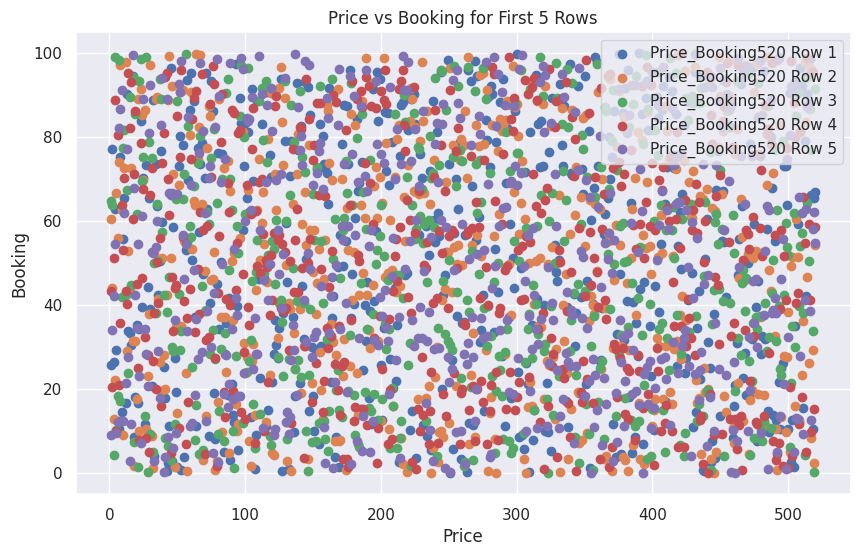

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting column names for Price_Booking columns
price_booking_columns = data.columns[4:]

plt.figure(figsize=(10, 6))

# Plotting the data for the first 5 rows
for idx, row in data[:5].iterrows():
    x = range(1, 521)
    y = []
    for col_name in price_booking_columns:
        y.append(row[col_name][0])
    plt.scatter(x, y, label=f'{col_name} Row {idx+1}')
    print(y)


plt.xlabel('Price')
plt.ylabel('Booking')
plt.title('Price vs Booking for First 5 Rows')

plt.legend()
plt.show()

In [6]:
cat_columns = ['Size']


def encode_categorical_columns(data, cat_columns):
  encoder = OneHotEncoder()
  encoder.fit(data[cat_columns])
  one_hot_encoded_output_train = encoder.transform(data[cat_columns])
  data.drop(columns=cat_columns, axis=1, inplace=True)
  encoded_df = pd.DataFrame(one_hot_encoded_output_train, columns=encoder.get_feature_names_out(cat_columns))
  return pd.concat([encoded_df, data], axis=1)

data = encode_categorical_columns(data, cat_columns)
val_data = encode_categorical_columns(val_data, cat_columns)

In [7]:
data.head()

,Size_1,Size_2,Size_3,Long,Lat,Light,Price_Booking1,Price_Booking2,Price_Booking3,Price_Booking4,...,Price_Booking511,Price_Booking512,Price_Booking513,Price_Booking514,Price_Booking515,Price_Booking516,Price_Booking517,Price_Booking518,Price_Booking519,Price_Booking520
0,1,0,0,5,-54,0,"(25.82068271676904, 0.7519)","(77.29030734504285, 0.1281)","(26.42977169141242, 0.7555)","(62.99594808649998, 0.2545)",...,"(15.452548500178054, 0.8098)","(79.16898963165264, 0.108)","(42.128169836948345, 0.4888)","(90.40108811925055, 0.0577)","(95.08379435621892, 0.0434)","(98.59868991395079, 0.0348)","(66.28525118972154, 0.209)","(10.438122191545451, 0.8847)","(65.58403874417343, 0.219)","(67.03639353949687, 0.207)"
1,0,1,0,15,34,1,"(60.5614418412558, 0.0441)","(44.09864114154084, 0.1872)","(12.864575260713796, 0.8316)","(22.15931742842302, 0.6385)",...,"(36.252092499116415, 0.2932)","(97.94984356954937, 0.0003)","(83.55961793769666, 0.0026)","(46.73238535091752, 0.1442)","(26.315070270634035, 0.5035)","(96.44073701826878, 0.0004)","(8.402180767240308, 0.8583)","(29.320140891961966, 0.448)","(2.347873700296099, 0.9208)","(54.38055023149264, 0.0792)"
2,0,0,1,52,33,1,"(64.77841886497515, 0.0978)","(63.79016149960564, 0.1055)","(4.2689974099545775, 0.9454)","(99.1170238991595, 0.0048)",...,"(38.22115060567866, 0.3989)","(4.443929498817734, 0.8718)","(94.07931546786537, 0.0075)","(64.28148553268129, 0.0959)","(50.52228570735669, 0.2264)","(86.83656236684291, 0.0155)","(76.91744425841044, 0.0374)","(33.86871398561934, 0.4942)","(0.4159661590927177, 0.9249)","(91.44157368958481, 0.0103)"
3,0,0,1,36,-32,0,"(43.51319658191266, 0.5933)","(20.583513389202647, 0.8548)","(51.335440281471314, 0.5031)","(88.96013764481202, 0.1404)",...,"(65.66340019323884, 0.3075)","(54.79499263500919, 0.4246)","(5.085965871041765, 0.8802)","(98.82202564164659, 0.083)","(59.43480296481752, 0.3801)","(41.154463469789526, 0.5986)","(9.927405560835512, 0.8888)","(95.51171633092292, 0.0999)","(15.3399616599158, 0.8736)","(58.67192259210717, 0.4038)"
4,1,0,0,29,49,0,"(9.023792361018867, 0.9172)","(34.06932873577466, 0.6672)","(42.200420426573835, 0.5574)","(54.54040575218243, 0.3914)",...,"(9.335770325450078, 0.8544)","(41.233911400951904, 0.5271)","(62.93835936133358, 0.2676)","(87.14023119112295, 0.0898)","(88.1610349091075, 0.0857)","(38.64205874576124, 0.5754)","(12.61911415987419, 0.8676)","(58.14450114233951, 0.3303)","(62.25082481310573, 0.2868)","(54.831370666551585, 0.3759)"


In [8]:
def get_useful_features(data):
  for col_name in price_booking_columns:
    data[col_name + '_ratio'] = data[col_name].apply(lambda x: x[1])
    data[col_name] = data[col_name].apply(lambda x: x[0])
    data[col_name + '_average_daily_price'] = data[col_name] / (7 * data[col_name + '_ratio'])
    data[col_name + '_days_in_week'] = data[col_name + '_ratio'] * 7
  return data
get_useful_features(data)
get_useful_features(val_data)
data.head()

Streaming output truncated to the last 5000 lines.
<ipython-input-8-771cb8bd4b65>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col_name + '_days_in_week'] = data[col_name + '_ratio'] * 7
<ipython-input-8-771cb8bd4b65>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col_name + '_ratio'] = data[col_name].apply(lambda x: x[1])
<ipython-input-8-771cb8bd4b65>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

,Size_1,Size_2,Size_3,Long,Lat,Light,Price_Booking1,Price_Booking2,Price_Booking3,Price_Booking4,...,Price_Booking517_days_in_week,Price_Booking518_ratio,Price_Booking518_average_daily_price,Price_Booking518_days_in_week,Price_Booking519_ratio,Price_Booking519_average_daily_price,Price_Booking519_days_in_week,Price_Booking520_ratio,Price_Booking520_average_daily_price,Price_Booking520_days_in_week
0,1,0,0,5,-54,0,25.820683,77.290307,26.429772,62.995948,...,1.4630,0.8847,1.685498,6.1929,0.2190,42.781500,1.5330,0.2070,46.263902,1.4490
1,0,1,0,15,34,1,60.561442,44.098641,12.864575,22.159317,...,6.0081,0.4480,9.349535,3.1360,0.9208,0.364260,6.4456,0.0792,98.089016,0.5544
2,0,0,1,52,33,1,64.778419,63.790161,4.268997,99.117024,...,0.2618,0.4942,9.790343,3.4594,0.9249,0.064249,6.4743,0.0103,1268.260384,0.0721
3,0,0,1,36,-32,0,43.513197,20.583513,51.335440,88.960138,...,6.2216,0.0999,136.581891,0.6993,0.8736,2.508497,6.1152,0.4038,20.757066,2.8266
4,1,0,0,29,49,0,9.023792,34.069329,42.200420,54.540406,...,6.0732,0.3303,25.147918,2.3121,0.2868,31.007584,2.0076,0.3759,20.838130,2.6313


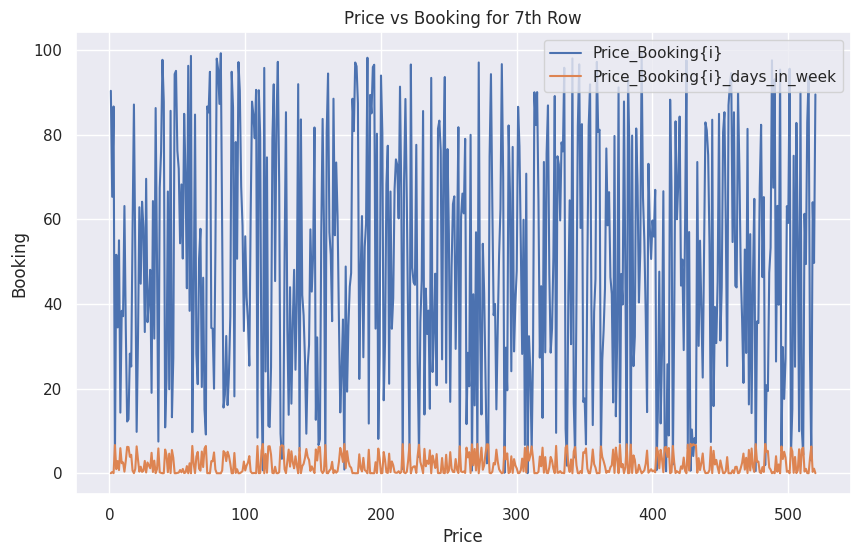

In [9]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plotting the data for the 7th row
x = range(1, 521)
y = []
y2 = []
y3 = []
for col_name in price_booking_columns:
    y.append(data.loc[6, col_name])
    y2.append(data.loc[6, col_name + '_average_daily_price'])
    y3.append(data.loc[6, col_name + '_days_in_week'])

plt.plot(x, y, label='Price_Booking{i}')
#plt.plot(x, y2, label='Price_Booking{i}_average_daily_price')
plt.plot(x, y3, label='Price_Booking{i}_days_in_week')

plt.xlabel('Price')
plt.ylabel('Booking')
plt.title('Price vs Booking for 7th Row')
plt.legend()
plt.show()


In [10]:
X_list = []
Y_list = []

obj_count = val_data.shape[0]

model = Sequential()
model.add(keras.layers.Embedding(515, 256, input_length=26))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy"])
model.summary()

for j in range(0, obj_count):
  X_list = []
  Y_list = []
  print(j)
  for i in range(1, 521 - 5):
    X = val_data.loc[j, ['Size_1',
              'Size_2',
              'Size_3',
              'Long',
              'Lat',
              'Light',
              f'Price_Booking{i}_ratio',
              f'Price_Booking{i}_average_daily_price',
              f'Price_Booking{i}_days_in_week',
              f'Price_Booking{i}',

              f'Price_Booking{i+1}_ratio',
              f'Price_Booking{i+1}_average_daily_price',
              f'Price_Booking{i+1}_days_in_week',
              f'Price_Booking{i+1}',
                     ##############
              f'Price_Booking{i+2}_ratio',
              f'Price_Booking{i+2}_average_daily_price',
              f'Price_Booking{i+2}_days_in_week',
              f'Price_Booking{i+2}',

              f'Price_Booking{i+3}_ratio',
              f'Price_Booking{i+3}_average_daily_price',
              f'Price_Booking{i+3}_days_in_week',
              f'Price_Booking{i+3}',

              f'Price_Booking{i+4}_ratio',
              f'Price_Booking{i+4}_average_daily_price',
              f'Price_Booking{i+4}_days_in_week',
              f'Price_Booking{i+4}',

              #f'Price_Booking{i+5}_ratio',
              #f'Price_Booking{i+5}_average_daily_price',
              #f'Price_Booking{i+5}_days_in_week',
              #f'Price_Booking{i+5}',
              #
              #f'Price_Booking{i+6}_ratio',
              #f'Price_Booking{i+6}_average_daily_price',
              #f'Price_Booking{i+6}_days_in_week',
              #f'Price_Booking{i+6}',


              ]]
    Y = val_data.loc[j, f'Price_Booking{i+5}']
    X_list.append(X)
    Y_list.append(Y)
  X_list = np.array(X_list)
  Y_list = np.array(Y_list)
  Y_list = np.expand_dims(Y_list, axis=-1)
  print(X_list.shape, Y_list.shape)
  model.fit(X_list, Y_list, epochs=50, batch_size=32)


Streaming output truncated to the last 5000 lines.
17/17 [==============================] - 0s 8ms/step - loss: 7.4759 - accuracy: 0.0000e+00
Epoch 23/50
17/17 [==============================] - 0s 9ms/step - loss: 5.4644 - accuracy: 0.0000e+00
Epoch 24/50
17/17 [==============================] - 0s 9ms/step - loss: 3.9512 - accuracy: 0.0000e+00
Epoch 25/50
17/17 [==============================] - 0s 9ms/step - loss: 3.3206 - accuracy: 0.0000e+00
Epoch 26/50
17/17 [==============================] - 0s 9ms/step - loss: 3.3270 - accuracy: 0.0000e+00
Epoch 27/50
17/17 [==============================] - 0s 9ms/step - loss: 3.0168 - accuracy: 0.0000e+00
Epoch 28/50
17/17 [==============================] - 0s 8ms/step - loss: 2.9668 - accuracy: 0.0000e+00
Epoch 29/50
17/17 [==============================] - 0s 9ms/step - loss: 3.0954 - accuracy: 0.0000e+00
Epoch 30/50
17/17 [==============================] - 0s 9ms/step - loss: 3.1916 - accuracy: 0.0000e+00
Epoch 31/50
17/17 [===============

KeyboardInterrupt: 

In [11]:
for j in range(0, obj_count):
  X_list = []
  Y_list = []
  for i in range(1, 521 - 5):
    X = val_data.loc[j, ['Size_1',
              'Size_2',
              'Size_3',
              'Long',
              'Lat',
              'Light',
              f'Price_Booking{i}_ratio',
              f'Price_Booking{i}_average_daily_price',
              f'Price_Booking{i}_days_in_week',
              f'Price_Booking{i}',

              f'Price_Booking{i+1}_ratio',
              f'Price_Booking{i+1}_average_daily_price',
              f'Price_Booking{i+1}_days_in_week',
              f'Price_Booking{i+1}',
                     ##############
              f'Price_Booking{i+2}_ratio',
              f'Price_Booking{i+2}_average_daily_price',
              f'Price_Booking{i+2}_days_in_week',
              f'Price_Booking{i+2}',

              f'Price_Booking{i+3}_ratio',
              f'Price_Booking{i+3}_average_daily_price',
              f'Price_Booking{i+3}_days_in_week',
              f'Price_Booking{i+3}',

              f'Price_Booking{i+4}_ratio',
              f'Price_Booking{i+4}_average_daily_price',
              f'Price_Booking{i+4}_days_in_week',
              f'Price_Booking{i+4}',

              #f'Price_Booking{i+5}_ratio',
              #f'Price_Booking{i+5}_average_daily_price',
              #f'Price_Booking{i+5}_days_in_week',
              #f'Price_Booking{i+5}',
              #
              #f'Price_Booking{i+6}_ratio',
              #f'Price_Booking{i+6}_average_daily_price',
              #f'Price_Booking{i+6}_days_in_week',
              #f'Price_Booking{i+6}',


              ]]
    Y = val_data.loc[j, f'Price_Booking{i+5}']
    X_list.append(X)
    Y_list.append(Y)
  X_list = np.array(X_list)
  Y_list = np.array(Y_list)
  Y_list = np.expand_dims(Y_list, axis=-1)
  preds = model.predict(X_list)
  print(np.mean((Y_list - preds)**2))

17/17 [==============================] - 1s 3ms/step
1179.0703275546982
17/17 [==============================] - 0s 3ms/step
1335.0779441733807
17/17 [==============================] - 0s 3ms/step
1330.0643596504935
17/17 [==============================] - 0s 3ms/step
1323.8731564302097
17/17 [==============================] - 0s 4ms/step
1228.514460079458
17/17 [==============================] - 0s 5ms/step
1209.784910212879
17/17 [==============================] - 0s 3ms/step
1125.0983752115878
17/17 [==============================] - 0s 4ms/step
1016.7073708105446
17/17 [==============================] - 0s 3ms/step
1220.7074677485296
17/17 [==============================] - 0s 3ms/step
1166.4506340523803
17/17 [==============================] - 0s 3ms/step
1164.4438416123846
17/17 [==============================] - 0s 3ms/step
1198.8999696353392
17/17 [==============================] - 0s 4ms/step
1301.5560349942027
17/17 [==============================] - 0s 4ms/step
1216.66498149

KeyboardInterrupt: 

In [12]:
preds = []

for j in range(0, obj_count):
  X = val_data.loc[j, ['Size_1',
              'Size_2',
              'Size_3',
              'Long',
              'Lat',
              'Light',

              #f'Price_Booking{514}_ratio',
              #f'Price_Booking{514}_average_daily_price',
              #f'Price_Booking{514}_days_in_week',
              #f'Price_Booking{514}',
#
              #f'Price_Booking{515}_ratio',
              #f'Price_Booking{515}_average_daily_price',
              #f'Price_Booking{515}_days_in_week',
              #f'Price_Booking{515}',

              f'Price_Booking{516}_ratio',
              f'Price_Booking{516}_average_daily_price',
              f'Price_Booking{516}_days_in_week',
              f'Price_Booking{516}',

              f'Price_Booking{517}_ratio',
              f'Price_Booking{517}_average_daily_price',
              f'Price_Booking{517}_days_in_week',
              f'Price_Booking{517}',

              f'Price_Booking{518}_ratio',
              f'Price_Booking{518}_average_daily_price',
              f'Price_Booking{518}_days_in_week',
              f'Price_Booking{518}',

              f'Price_Booking{519}_ratio',
              f'Price_Booking{519}_average_daily_price',
              f'Price_Booking{519}_days_in_week',
              f'Price_Booking{519}',

              f'Price_Booking{520}_ratio',
              f'Price_Booking{520}_average_daily_price',
              f'Price_Booking{520}_days_in_week',
              f'Price_Booking{520}',

  ]]

  X = np.expand_dims(X, axis=0)
  prediction_i = model.predict(X)
  preds.append(prediction_i)

preds = np.array(preds)
preds

1/1 [==============================] - 0s 29ms/step


array([[[41.169212]],

       [[79.262726]],

       [[52.151215]],

       ...,

       [[78.27731 ]],

       [[49.123547]],

       [[48.161552]]], dtype=float32)

In [13]:
preds = preds.reshape((2000, 1))
preds

array([[41.169212],
       [79.262726],
       [52.151215],
       ...,
       [78.27731 ],
       [49.123547],
       [48.161552]], dtype=float32)

In [15]:
np.savetxt('output_benchmark_data.csv', preds, fmt='%g', delimiter=',')